# THE RELSTIONSHIP BETWEEN SAT SCORES AND NYC PUBLIC SCHOOL CHARACTERISTICS IN 2014-2015 SCHOOL YEAR 

## Introduction
The entire project aims to find and analyze the linear relationship between SAT scores (Y) and school characteristics of NYC public schools, particularly the share of minorities and locations (X's). At the end, we will understand what and how  school characteristics influenced students' SAT scores (Y) in NYC public schools in 2014-2015 school year. The dataset is downloaded from https://www.kaggle.com/nycopendata/high-schools, where the high school data was compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board.

Particularly in this project, I will conduct exploatory analysis on average SAT scores and the percentage of White, Black, Hispanic,and Asian students in NYC public schools in 2014-2015 school year by investigating their distributions and calculating, comparing, and plotting data statistics. Then, I will evaluate the sufficiency of the evidence drawn from the data and comment on what the evidence can be used to solve the problem.

### 1. Load and Clean the Data

In [1]:
import pandas as pd 
import numpy as np 
import qeds
qeds.themes.mpl_style()
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#load the data
df = pd.DataFrame(pd.read_csv("C:/Users/Owner/Desktop/ECO225/wk3/GitExercise/project 1/scores.csv"))
#take a look at what variables are included in the DataFrame
df.columns
#I want to investigate the average total scores, so we create a new column and add three scores together
df['Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + \
df['Average Score (SAT Writing)']
# remove all rows with NaNs, rest the index, and drop the unwanted columns
satdf = df.drop(['School ID', 'Building Code', 'Street Address', 'State', 'Phone Number', 'Average Score (SAT Math)',\
                'Average Score (SAT Reading)', 'Average Score (SAT Writing)'], axis = 1)
satdf = satdf.dropna().reset_index().drop(["index"], axis = 1)
#convert entries with "%" to float type data
satdf.columns
for i in range(9, 14):
    satdf[satdf.columns[i]] = satdf[satdf.columns[i]].str.replace("%", "")
    satdf[satdf.columns[i]] = pd.to_numeric(satdf[satdf.columns[i]])
satdf.head(2)
#satdf.info(), uncomment to check the type of data

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score
0,"New Explorations into Science, Technology and ...",Manhattan,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,91.0,1859.0
1,Essex Street Academy,Manhattan,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,78.9,1193.0


### 2. Summary Statistics of Independent and Dependent Variables
The independent variables(Y) is`Average SAT Score` and the dependent variables (X's) are `Percent White`, `Percent Black`, `Percent Hispanic`, and `Percent Asian`.

In [3]:
d0 = satdf[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']]
satdf2 = pd.concat([satdf['Average SAT Score'], d0], axis = 1)
d1 = pd.concat([satdf2.describe(), satdf2.mode()], axis = 0)
d1.rename(index = {0: 'mode'})

,Average SAT Score,Percent White,Percent Black,Percent Hispanic,Percent Asian
count,374.000000,374.000000,374.000000,374.000000,374.000000
mean,1275.347594,8.524599,35.387166,43.929679,10.412567
std,194.866056,13.359205,25.367159,24.495584,14.400556
min,924.000000,0.000000,0.000000,2.600000,0.000000
25%,1157.000000,1.300000,16.400000,20.825000,1.600000
50%,1226.000000,2.600000,28.750000,45.300000,4.200000
75%,1327.000000,9.375000,50.100000,63.375000,11.150000
max,2144.000000,79.900000,91.200000,100.000000,88.900000
mode,1161.000000,1.200000,0.000000,56.900000,0.000000


From the summary table above, mean of the `Average SAT Score` is greater than its median, this implies that the distribution of `Average SAT Score` is right skewed. By appling the comparison to the dependent variables, notice that except for `Percent Hispanic` whose distribution is left skewed, those of `Percent White`, `Percent Black`, and `Percent Asian` are all right skewed. The minimum Average SAT score of public schools is 924 whereas the highest scores in 2144. The range is 1220, which is very large. This shows that there is a large gap between the effectiveness of educationa and the quality of teaching of best schools and worst schools. The interquartile range of `Average SAT Score` is 170 and its standard deviation is around 195, showing that the distribution of `Average SAT Score` has a long tail on the right since the third quartile is within mean±2σ, but the maximum is outside the interval of mean±4σ.  

I noticed that the percentage of White, Black, and Asian students in some NYC public schools is 0% and it happens more often for Black and Asian students since the modes for `Percent Black` and `Percent Asian` are also 0. 
In contrast, the percentage of Hispanic students reached 100% in some schools. By looking at the mean and median (50%) of the dependent variables, I found that the values for `Percent White` and `Percent Asian` are similar but much smaller than that of `Percent Black` and `Percent Hispanic`. This means that, overall, NYC public schools have more Hispanic and Black students than White and Asian. Also, the standard deviations for `Percent White` and `Percent Asian` are similar and smaller than those of `Percent Black` and `Percent Hispanic`. This mean that distributions of former ones are less spreaded or dispersed than those of latter ones.
Meanwhile, the ranges and IQRs of `Percent Black` and `Percent Hispanic` are greater than those of `Percent White` and `Percent Asian`. 

Besides, the size of the dataset is 374, which is small. So there may not be sufficient evidence for us solve the question accurately.

### 3. Plot Independent Variable
The independent variables(Y) is`Average SAT Score`. I plot a histogram to see the distribution of avgerage SAT scores of NYC Public Schools in 2014-2015 school year.

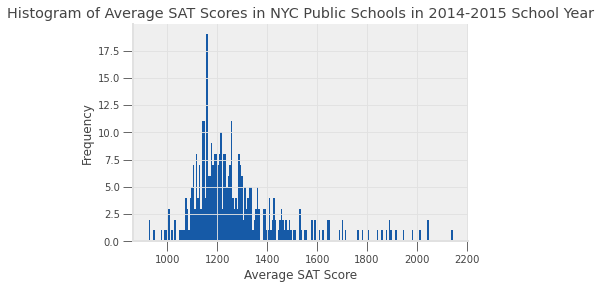

In [4]:
#get the number of rows/schools in the dataframe, used to determine number of bins
len(satdf)
d2 = satdf['Average SAT Score']
d2.plot.hist(bins = 200, title = 'Histogram of Average SAT Scores in NYC Public Schools in 2014-2015 School Year')
plt.xlabel('Average SAT Score')
plt.show()

The distribution of `Average SAT Score` is right skewed, with the mode at 1161 (based on the graph and the summary statistics in section 2). The shape is reasonable since few students get very low or very high scores in the test, and most students get scores somewhere in the middle. This finding from the histogram corresponds to the those in section 2 from the summary table.

### 4. Plot Dependent Variables
The dependent variables(X) are `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`.

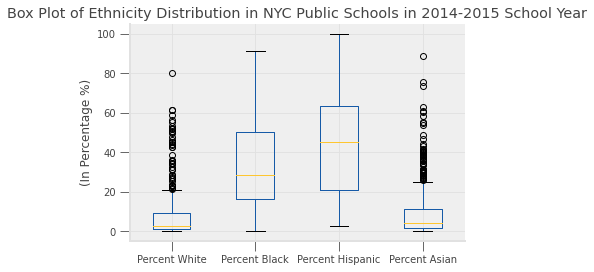

In [5]:
d0.boxplot()
plt.title('Box Plot of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year')
plt.ylabel('(In Percentage %)')
plt.show()

From the boxplot, the percentage of Hispanic students is the highest among NYC Public Schools in 2014-2015 School Year, followed by that of Black students, Asian, and White Students. 

Notice that the distribution of `Percent White`and `Percent Asian` look similar. The values are mainly below 20% with a lot of outliers that are larger than the main 'body' of the data. So, they are both right skewed. Their range, first, second, third quartiles, and thus IQR are about the same value.

The range of `Percent Black` and `Percent Hispanic` are similar, but their distributions are different. `Percent Black`'s distribution is slightly right skewed whereas `Percent Hispanic`'s is left skewed. There is no outlier in their data. Overall, the percentage of Hispanic students is around 5% higher than the percentage of Black students.

These findings correspond to what we got in section 2 from the summary table.

### 5. Plot The Correlation
In this section, I will calculate and plot the correlation between average SAT scores (Y) and the percentage of White, Black, Hispanic, and Asian students (X's).

In [6]:
#the menthod calculates the correlation between all columns in the dataframe
#for simplicity, we only take a look at the first column of the resulted dataframe
satdf2.corr()['Average SAT Score'][1:len(satdf2)]

Percent White       0.622380
Percent Black      -0.302675
Percent Hispanic   -0.410191
Percent Asian       0.608893
Name: Average SAT Score, dtype: float64

The results above are the correlation between average SAT scores and the percentage of White, Black, Hispanic, and Asian students respectively. To get a better understanding, I made scatterplots for average SAT scores against each `Percent`.

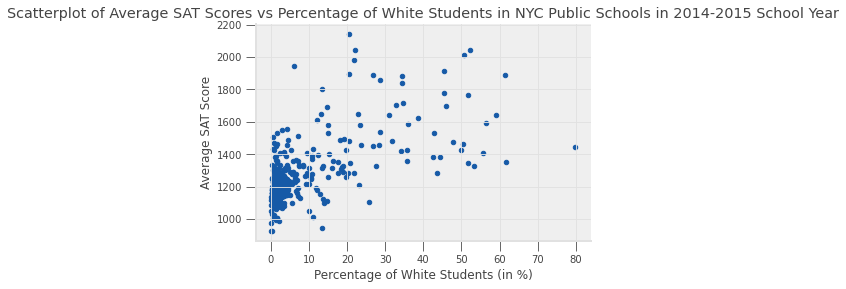

In [7]:
satdf2.plot.scatter(x = 'Percent White', y = 'Average SAT Score')
plt.title('Scatterplot of Average SAT Scores vs Percentage of White Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of White Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent White` is 0.622380, indicating a moderate positive relationship bewteen the average SAT score and the percentage of White students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that overall, the average SAT score increases with increaseing percentage of White students. This pattern is not clear since most of the data cluster at the left bottom corner. Doing a log transformation may solve the problem, but the interpretation of the transformed variable is less meaningful.

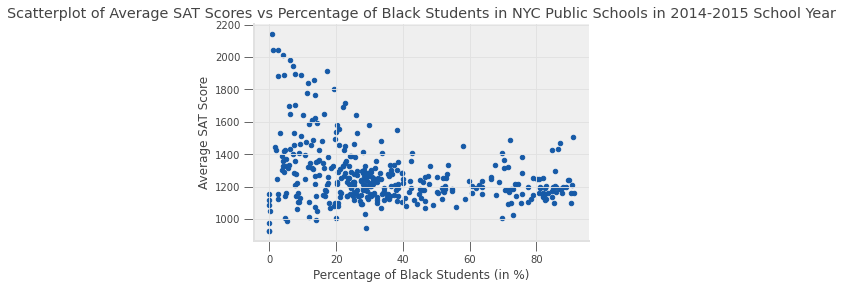

In [8]:
satdf2.plot.scatter(x = 'Percent Black', y = 'Average SAT Score')
plt.title('Scatterplot of Average SAT Scores vs Percentage of Black Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Black Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent Black` is -0.302675, indicating a weak negative relationship bewteen the average SAT score and the percentage of Black students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Black` is less than 40%, the average SAT score decreases in general with increaseing percentage of Black students whereas the `Average SAT Score` remained steady as `Percent Black` increase from 40% to above 80%.

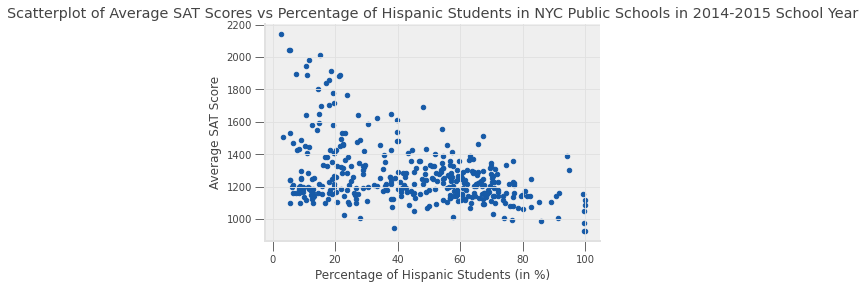

In [9]:
satdf2.plot.scatter(x = 'Percent Hispanic', y = 'Average SAT Score')
plt.title('Scatterplot of Average SAT Scores vs Percentage of Hispanic Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Hispanic Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent Black`. The correlation between `Average SAT Score` and `Percent Hispanic` is -0.410191, indicating a weak negative relationship bewteen the average SAT score and the percentage of Hispanic students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Hispanic` is less than 40%, the average SAT score decreases in general with increaseing percentage of Hispanic students whereas the pattern gets unclear as `Percent Black` increase from 40% to 100%.

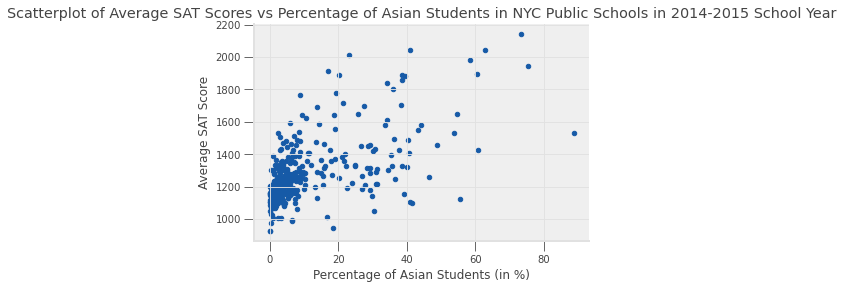

In [10]:
satdf2.plot.scatter(x = 'Percent Asian', y = 'Average SAT Score')
plt.title('Scatterplot of Average SAT Scores vs Percentage of Asian Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Asian Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent White`. The correlation between `Average SAT Score` and `Percent Asian` is 0.608893, indicating a moderate positive relationship bewteen the average SAT score and the percentage of Asian students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that overall, the average SAT score increases with increaseing percentage of Asian students.

### 6. Deeper Investigation using GroupBy
In this section, I will use Groupby to explore more about the covariates and their correlations with the outcome.

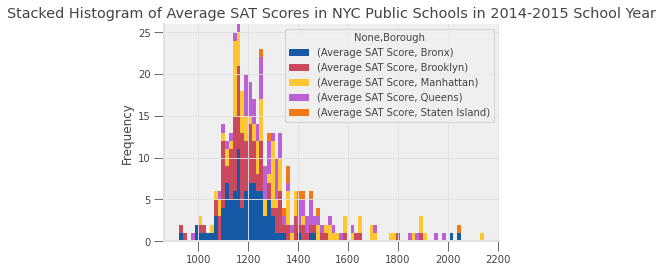

In [11]:
#investigate the number of groups by each variable
df["City"].unique() 
df["Borough"].unique()
satdf3 = pd.concat([satdf["Borough"], satdf2], axis = 1)
satdf3.columns
sat_B = satdf3[["Average SAT Score", "Borough"]]
sat_B.pivot(columns = "Borough").plot(kind = 'hist', stacked = True, bins = 80)
plt.title("Stacked Histogram of Average SAT Scores in NYC Public Schools in 2014-2015 School Year")
plt.show()


From the stacked histogram above, it can be seen that the distributions of Average SAT Scores in NYC Public Schools in 2014-2015 School Year are similar across boroughs.


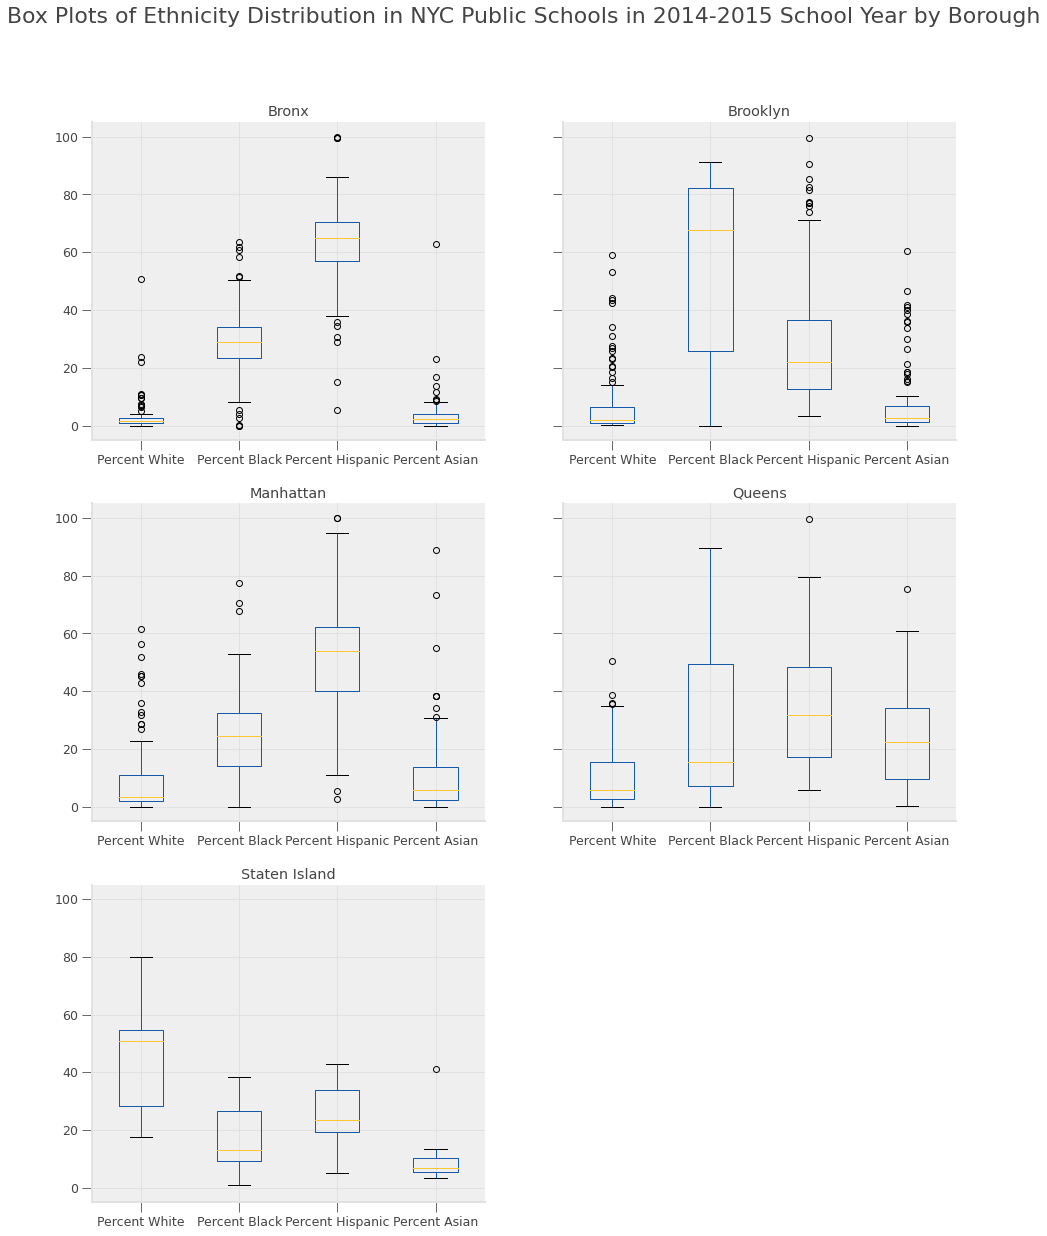

In [12]:
gbB_pct = satdf3.drop("Average SAT Score", axis = 1).groupby("Borough")
gbB_pct.boxplot(fontsize = 12.5, figsize = (15, 20))
plt.suptitle("Box Plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year by Borough", \
             fontsize = 22)
plt.show()

The above are box plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year across boroughs. Notice that the distribution varies significantly between boroughs.

The distribution of ethnicity in Bronx and Manhattan are similar: `Percent White`, `Percent Asian`, and `Percent Black` are right skewed, `Percent Hispanic` is slightly left skewed. The percentage of White and Asian students are the least and have similar values, followed by the percentage of Black and Hispanic. These 2 boroughs have similar patterns of ethnicity distribution as the entire NYC in section 3.

For Brooklyn, the distribution of `Percent White` and `Percent Asian` are similar: right skewed, similar quartiles and range. But here, `Percent Hispanic` is also right skewed, with smaller values than `Percent Black` in general. Here, `Percent Black` is slightly left skewed and with the larget range and quartile values among all ethnicity groups.

Then, in Queens, the four variables' distributions all have right skewness. Overall,  `Percent White` has the smallest value. followed by  `Percent Asian`,  `Percent Black`, and `Percent Hispanic`.

In Staten Island, it is obvious that `Percent White` has the highest value among all ethnicity groups, with slight left skewness. This situation only exists in borough Staten Island. The distributions of the variables of other 3 ethnicity groups are right skewed with `Percent Hispanic` having larger values, followed by `Percent Black` and `Percent Asian`.

Since the pattern in Staten Island is so distinct from others, I take a look at the average scores and evaluate the findings based on the number of schools investigated in each borough.

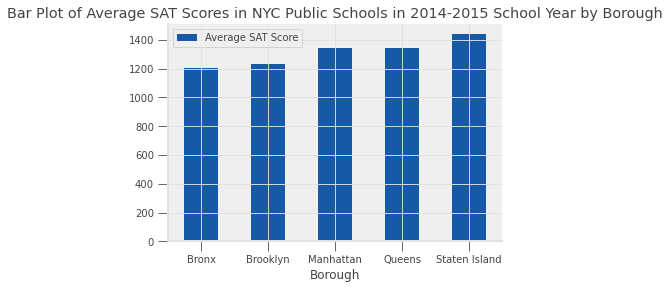

In [13]:
sat_B.groupby("Borough").mean().plot.bar(rot = 0)
plt.title("Bar Plot of Average SAT Scores in NYC Public Schools in 2014-2015 School Year by Borough")
plt.show()


In [14]:
sat_B.groupby("Borough").count()

,Average SAT Score
Borough,
Bronx,98
Brooklyn,109
Manhattan,89
Queens,68
Staten Island,10


See from the bar plot that schools in Staten Island has the highest Average SAT scores compared to other boroughs. But since the number of schools in Staten Island investigated in the dataset is 10, which is too small, there is insufficient evidence to conclude that greater percentage of White students will have positive impact on the SAT scores. 

Besides, among the other 4 boroughs, schools in Manhattan has the highest Average SAT scores, but from the boxplot, `Percent Hispanic` is the highest among all ethnicity groups. We cannot conclude higher proportion of Hispanic students at school also leads to higher average SAT scores because in Bronx, `Percent Hispanic` is also the highest, but its average score is the lowest among all boroughs in NYC from the barplot.



## Conclusion

The distribution of average SAT scores are similar across the boroughs in NYC such that the overall distribution also has similar patterns as them: right skewed. But the distribution of ethnicity varies from boroughs to boroughs, and the overall pattern is largely influeced by the places that have larger amount of data in the dataset. 

So far, by looking at the pattern generally and individually, their isn't sufficient evidence to find a relationship between average SAT scores and ethnicity distribution. To better understand the relationship, we need to either increase the size of the dataset by adding more statistics or include more covariates into consideration and run a linear regression of X on Y.